<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">KANs for Loan Approval Prediction
 (Classification)
</h1>  
     
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>Overview</font></h3>
    
* In this notebook I implement a Kolmogorov-Arnold Network (KAN) for Loan Approval Prediction and compare it against a neural network of a similar architecture.
* this dataset has more data than breast canser prediction and we want to assess KANs on larger datasets.
* The dataset is from Kaggle, available at this https://www.kaggle.com/competitions/playground-series-s4e10
    



# Import Packages


In [1]:
import torch
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

## Loading the Dataset

In [2]:
data = pd.read_csv("data/loan_approval.csv")
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
data = data.dropna()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87283 entries, 0 to 91225
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          87283 non-null  int64  
 1   person_age                  87283 non-null  int64  
 2   person_income               87283 non-null  int64  
 3   person_home_ownership       87283 non-null  object 
 4   person_emp_length           87283 non-null  float64
 5   loan_intent                 87283 non-null  object 
 6   loan_grade                  87283 non-null  object 
 7   loan_amnt                   87283 non-null  int64  
 8   loan_int_rate               87283 non-null  float64
 9   loan_percent_income         87283 non-null  float64
 10  cb_person_default_on_file   87283 non-null  object 
 11  cb_person_cred_hist_length  87283 non-null  int64  
 12  loan_status                 87283 non-null  int64  
dtypes: float64(3), int64(6), object(4)
m

<Axes: >

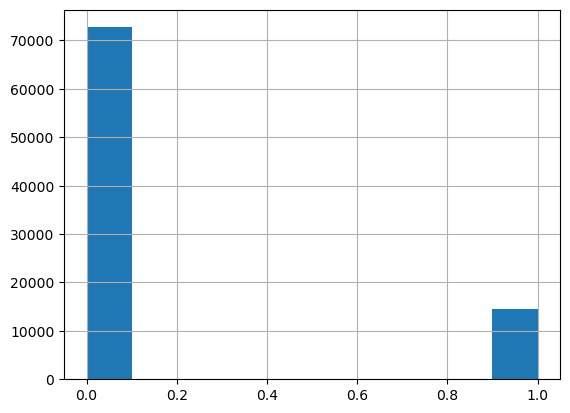

In [5]:
data.loan_status.hist()

In [6]:
# Split dataset into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=1)

## Preprocessing

In [7]:
def Preprocessing(data):
    #Remove id column
    data = pd.get_dummies(data)
    data = data.drop(columns=['id'])

    #StandardScaler
    sacale = StandardScaler()
    target = data['loan_status']
    data = sacale.fit_transform(data.drop(columns=['loan_status']))
    return data, target.tolist()

In [8]:
train_x, train_y = Preprocessing(train_data)
test_x, test_y = Preprocessing(test_data)

In [9]:
test_x

array([[-0.09692019,  0.12203217, -1.13577685, ..., -0.03470453,
         0.42492824, -0.42492824],
       [-0.91721294, -0.0384041 , -0.65714086, ..., -0.03470453,
        -2.35333853,  2.35333853],
       [-0.42503729,  1.4972002 ,  0.06081312, ..., -0.03470453,
        -2.35333853,  2.35333853],
       ...,
       [-0.91721294,  1.03881085,  0.30013111, ..., -0.03470453,
         0.42492824, -0.42492824],
       [ 3.1842508 ,  0.41998524, -0.41782287, ..., -0.03470453,
         0.42492824, -0.42492824],
       [ 1.2155482 , -0.3134377 ,  0.7787671 , ..., -0.03470453,
        -2.35333853,  2.35333853]])

## A summary of various machine learning methods and their accuracy

In [10]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

lcf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
train, test = lcf.fit(train_x, test_x, train_y, test_y)

100%|██████████| 29/29 [01:24<00:00,  2.90s/it]

[LightGBM] [Info] Number of positive: 11650, number of negative: 58176
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 978
[LightGBM] [Info] Number of data points in the train set: 69826, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166843 -> initscore=-1.608167
[LightGBM] [Info] Start training from score -1.608167


In [11]:
train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.94,0.85,0.85,0.94,6.89
LGBMClassifier,0.94,0.85,0.85,0.94,0.31
BaggingClassifier,0.93,0.84,0.84,0.93,2.73
ExtraTreesClassifier,0.94,0.84,0.84,0.93,5.03
SVC,0.93,0.82,0.82,0.93,54.04
DecisionTreeClassifier,0.87,0.82,0.82,0.88,0.43
KNeighborsClassifier,0.92,0.81,0.81,0.92,0.89
AdaBoostClassifier,0.90,0.80,0.80,0.90,1.80
ExtraTreeClassifier,0.88,0.79,0.79,0.88,0.12


In [12]:
test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.94,0.85,0.85,0.94,6.89
LGBMClassifier,0.94,0.85,0.85,0.94,0.31
BaggingClassifier,0.93,0.84,0.84,0.93,2.73
ExtraTreesClassifier,0.94,0.84,0.84,0.93,5.03
SVC,0.93,0.82,0.82,0.93,54.04
DecisionTreeClassifier,0.87,0.82,0.82,0.88,0.43
KNeighborsClassifier,0.92,0.81,0.81,0.92,0.89
AdaBoostClassifier,0.90,0.80,0.80,0.90,1.80
ExtraTreeClassifier,0.88,0.79,0.79,0.88,0.12


## Prepare data for KAN

In [13]:
dataset = {}
dataset['train_input'] = torch.tensor(train_x, dtype=torch.float32)
dataset['test_input'] = torch.tensor(test_x, dtype=torch.float32)
dataset['train_label'] = torch.tensor(train_y, dtype=torch.long)
dataset['test_label'] = torch.tensor(test_y, dtype=torch.long)

In [14]:
dataset['train_input']

tensor([[ 5.4432e+00, -1.0270e-01,  1.5742e+00,  ..., -3.1904e-02,
         -2.2958e+00,  2.2958e+00],
        [-4.2604e-01, -7.2435e-01, -1.1857e+00,  ..., -3.1904e-02,
         -2.2958e+00,  2.2958e+00],
        [-9.1515e-01, -1.0270e-01,  3.1972e-01,  ..., -3.1904e-02,
         -2.2958e+00,  2.2958e+00],
        ...,
        [-2.6301e-01, -4.1353e-01, -6.8390e-01,  ..., -3.1904e-02,
          4.3557e-01, -4.3557e-01],
        [ 3.8913e-01,  9.0203e-04, -6.8390e-01,  ..., -3.1904e-02,
          4.3557e-01, -4.3557e-01],
        [ 2.2609e-01, -3.0992e-01, -1.8209e-01,  ..., -3.1904e-02,
          4.3557e-01, -4.3557e-01]])

In [15]:
print("Train data shape: {}".format(dataset['train_input'].shape))
print("Train target shape: {}".format(dataset['train_label'].shape))
print("Test data shape: {}".format(dataset['test_input'].shape))
print("Test target shape: {}".format(dataset['test_label'].shape))
print("====================================")

Train data shape: torch.Size([69826, 26])
Train target shape: torch.Size([69826])
Test data shape: torch.Size([17457, 26])
Test target shape: torch.Size([17457])


## Creating and Training the KAN [26, 2]

In [16]:
model = KAN(width=[26, 2], grid=5, k=3, seed=0)

checkpoint directory created: ./model
saving model version 0.0


In [17]:
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

In [18]:
%%time

results = model.fit(dataset, 
                    opt="Adam",
                    metrics=(train_acc, test_acc),
                    loss_fn=torch.nn.CrossEntropyLoss(),
                    steps=100)

| train_loss: 5.98e-01 | test_loss: 1.38e+00 | reg: 9.19e+01 | : 100%|█| 100/100 [00:59<00:00,  1.69

saving model version 0.1
CPU times: total: 32.9 s
Wall time: 59.2 s


In [19]:
print('Training Accuracy :', results['train_acc'][-1])
print('Test Accuracy :', results['test_acc'][-1])

Training Accuracy : 0.8961275219917297
Test Accuracy : 0.852838397026062


In [20]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print('Total trainable parameters :', params)

Total trainable parameters : 728


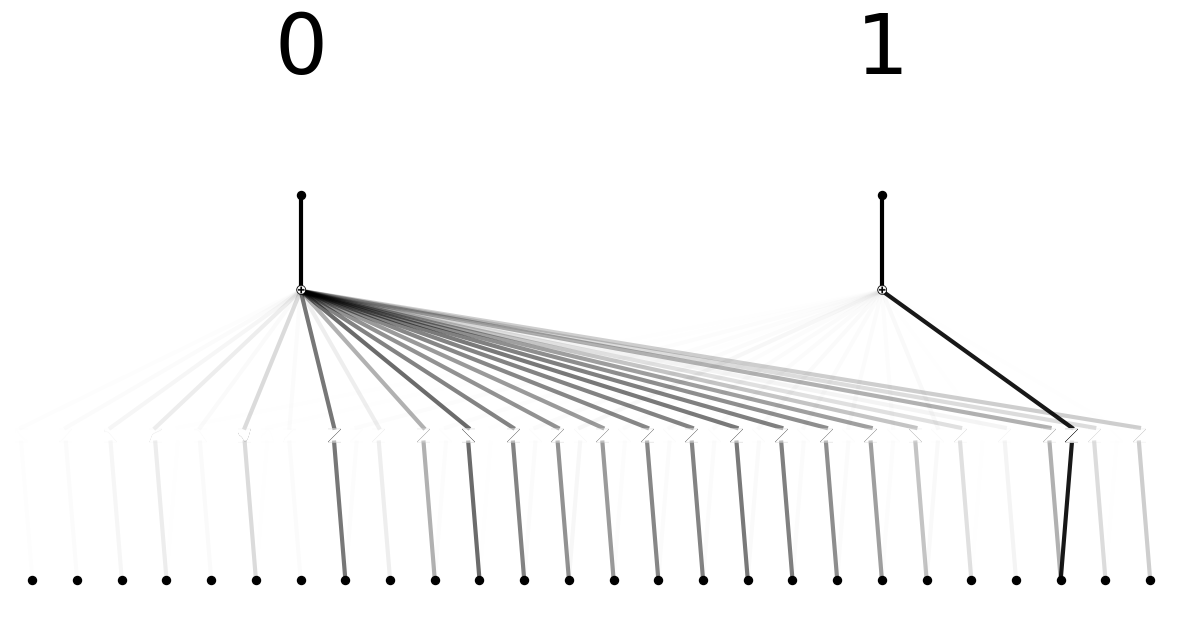

In [21]:
model.plot(scale=1.5, out_vars=[0,1])

## Creating and Training the KAN [26, 26, 2]

In [45]:
model = KAN(width=[26, 10, 2], grid=5, k=3, seed=0)

checkpoint directory created: ./model
saving model version 0.0


In [46]:
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

In [47]:
%%time

results = model.fit(dataset, 
                    opt="Adam",
                    metrics=(train_acc, test_acc),
                    loss_fn=torch.nn.CrossEntropyLoss(),
                    steps=100)

| train_loss: 2.59e+00 | test_loss: 3.99e+01 | reg: 6.59e+03 | : 100%|█| 100/100 [37:52<00:00, 22.73

saving model version 0.1
CPU times: total: 2min 14s
Wall time: 37min 52s


In [48]:
print('Training Accuracy :', results['train_acc'][-1])
print('Test Accuracy :', results['test_acc'][-1])

Training Accuracy : 0.8968436121940613
Test Accuracy : 0.8060376644134521


In [49]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print('Total trainable parameters :', params)

Total trainable parameters : 3920


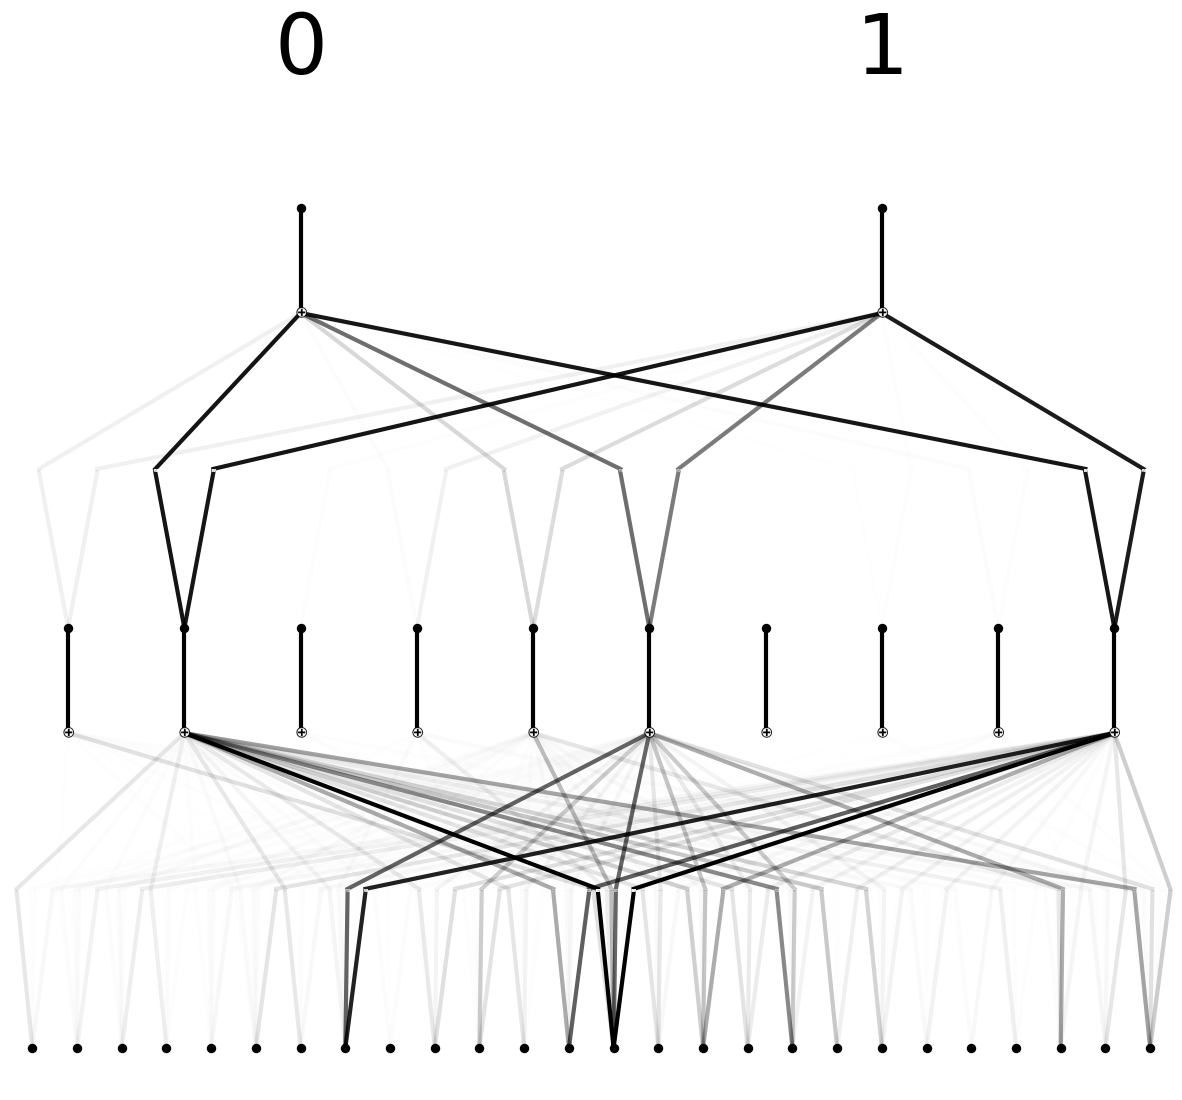

In [50]:
model.plot(scale=1.5, out_vars=[0,1])

# Implementation of a Neural Network for comparison

In [51]:
device = 'cpu'
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(26, 26)  # 4 inputs to 5 hidden nodes
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(26, 2)  # 5 hidden nodes to 3 outputs

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

def train_model(model, train_loader, criterion, optimizer, num_epochs=100):
    model.train()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy}%')

In [52]:
def load_dataset():
    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(dataset['train_input'], dataset['train_label']), batch_size=1000, shuffle=False)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(dataset['test_input'], dataset['test_label']), batch_size=1000, shuffle=False)

    return train_loader, test_loader

train_loader, test_loader = load_dataset()

## Train and Evaluate the NN

In [53]:
%%time

model = NeuralNetwork().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

train_model(model, train_loader, criterion, optimizer, num_epochs=100)

Epoch 1, Loss: 0.385638952255249
Epoch 2, Loss: 0.3020900785923004
Epoch 3, Loss: 0.27115219831466675
Epoch 4, Loss: 0.2555645704269409
Epoch 5, Loss: 0.24675895273685455
Epoch 6, Loss: 0.24020834267139435
Epoch 7, Loss: 0.23561866581439972
Epoch 8, Loss: 0.23217366635799408
Epoch 9, Loss: 0.22949905693531036
Epoch 10, Loss: 0.22713632881641388
Epoch 11, Loss: 0.22480903565883636
Epoch 12, Loss: 0.2227293998003006
Epoch 13, Loss: 0.2205154001712799
Epoch 14, Loss: 0.21835637092590332
Epoch 15, Loss: 0.21664701402187347
Epoch 16, Loss: 0.2152629941701889
Epoch 17, Loss: 0.21410329639911652
Epoch 18, Loss: 0.21320584416389465
Epoch 19, Loss: 0.2125760167837143
Epoch 20, Loss: 0.21210812032222748
Epoch 21, Loss: 0.2115006297826767
Epoch 22, Loss: 0.21099601686000824
Epoch 23, Loss: 0.21047534048557281
Epoch 24, Loss: 0.21010209619998932
Epoch 25, Loss: 0.209544837474823
Epoch 26, Loss: 0.20895758271217346
Epoch 27, Loss: 0.20840738713741302
Epoch 28, Loss: 0.20797233283519745
Epoch 29, Lo

In [54]:
test_model(model, test_loader)

Accuracy: 93.58423555020909%


In [55]:
test_model(model, train_loader)

Accuracy: 93.7129436026695%


In [56]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
params

756

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: green; font-size:100%; text-align:left">

<h3 align="center"><font color='white'>💡 Summary from above :</font></h3>

1. Neural Network architecture is much better than KAN 
